# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))))


# Imports

In [7]:
import plotter
import datahandler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Constants

In [4]:
FOLDER_NAME = "2024_04_30_13_08_17_NONE"
DATE_BOUNDS = ("2017-08-10 07:00:00", "2017-08-10 18:59:59")

FOLDER_PATH = os.path.join(os.path.dirname(constants.PROJECT_DIRECTORY_PATH), "Simulator", "data", FOLDER_NAME)


In [5]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(False, False, True)


Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


# Main

### Test results from Time Segment Experiment

In [23]:
fitness_values = [
    0.09, 0.08, 0.09, 0.10, 0.09, 0.08, 0.06, 0.08, 0.08,
    0.07, 0.08, 0.07, 0.09, 0.09, 0.10, 0.09, 0.08, 0.10,
    0.10, 0.09, 0.09, 0.09, 0.10, 0.10
]

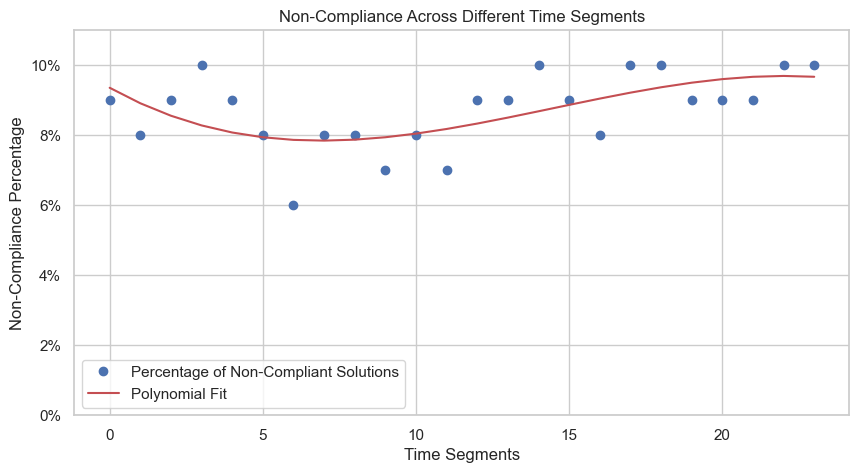

In [29]:

sns.set(style="whitegrid")

fitness_values_percent = [value * 100 for value in fitness_values]

x_values = np.arange(len(fitness_values))
coefficients = np.polyfit(x_values, fitness_values, 1)
polynomial = np.poly1d(coefficients)
y_poly = polynomial(x_values) * 100  # Scale up for percentage

plt.figure(figsize=(10, 5))
plt.plot(fitness_values_percent, 'o', label='Percentage of Non-Compliant Solutions', color=sns.color_palette("deep")[0])
plt.plot(x_values, y_poly, '-', label='Polynomial Fit', color=sns.color_palette("deep")[3])

fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.title('Non-Compliance Across Different Time Segments')
plt.xlabel('Time Segments')
plt.ylabel('Non-Compliance Percentage')
plt.ylim(0, 11)
plt.legend()
plt.grid(True)
plt.show()
